In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [43]:
titanic = pd.read_csv('./datasets/train.csv', sep=',', header=0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Parte 1: Dataset Titanic
### 1) Hipóteses da prática anterior:

1. Pessoas com até 30 anos de idade sobreviveram mais que pessoas mais velhas.

2. Passageiros que pagaram mais sobreviveram mais que os que pagaram menos.

3. Sobreviveram mais mulheres do que homens.

### 2) Atributos Selecionados:

De acordo com as necessidades das hipóteses, escolhemos esses 4 atributos:
- Survived
- Sex
- Age
- Fare
- SibSp
- Parch

### 3) Novas hipóteses:

1. Como se comporta a taxa de sobrevivencia com relação as faixas etárias?
2. Há alguma relação linear entre Parch, SibSp e Fare?
3. A idade influencia no Fare?

### 3) Análise Exploratória

In [44]:
titanic_atributes = titanic[['Sex', 'Age', 'Fare','SibSp', 'Parch', 'Survived']]
target_names = ['No', 'Yes']

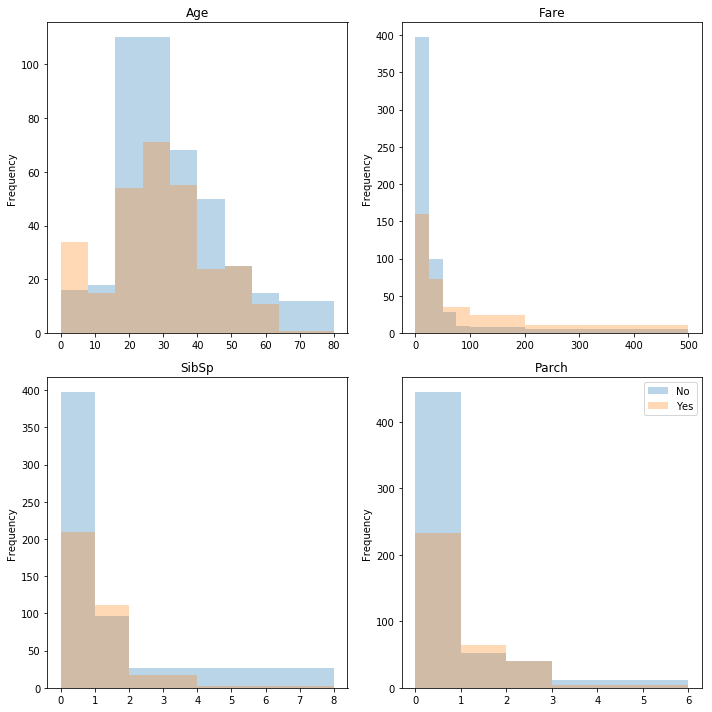

In [45]:
columns = titanic_atributes.columns.tolist()

plt.figure(figsize=(10,10))
for col in range(2,6):
    
    if col == 2:
        bins = [0,8,16,24,32,40,48,56,64,80]
    elif col == 3:
        bins = [0,25,50,75,100,200,500]
    elif col == 4:
        bins = [0,1,2,4,8]
    elif col == 5:
        bins = [0,1,2,3,6]
        
    ax = plt.subplot(2, 2, col-1)
    ax.set_title(columns[col-1])
    
    for c in titanic_atributes.Survived.unique():
        titanic_atributes.loc[titanic_atributes.Survived == c, columns[col-1]].plot.hist(alpha=0.3, bins=bins)

plt.legend(target_names)
plt.tight_layout()
plt.show()

### 4) Respondendo às hipóteses

#### Escolha do parâmetro de intervalo

A escolha do parâmetro de intervalo foi feita por atributo, sendo que os dois ultimos estão divididos dessa forma para deixar os intervalos inteiros (nesse domínio não faz sentido usar decimal). A idade é dividida de 8 em 8 pois dada a forma como os dados estão estruturados essa é a melhor representação para compreensão sendo que, a partir do 64 não há muitos elementos então deixamos o intervalo maior. Já no fair os intervalos são menores no começo pois há muitos valores e deixamos maiores no final por conter poucos valores nesse intervalo.

#### Relação do BoxPlot com o histograma

Ambos mostram a distribuição dos dados, enquanto o boxplot padrão limita em dados entre invervalos relacionados a mediana ie (entre 1-2 e 2-3 Quartil, além de valores fora deles) o histograma permite uma divisão em mais faixas de valores. 

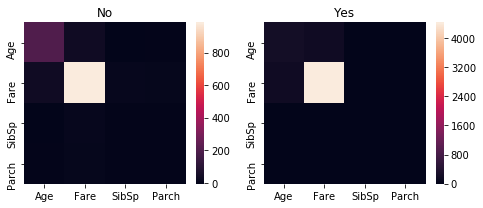

In [47]:
# covarianca por classe

plt.figure(figsize=(10, 3))
for c_i, c in enumerate(titanic_atributes.Survived.unique()):
    ax = plt.subplot(1, 3, c+1)
    plt.title(target_names[c_i])
    cov = titanic_atributes.loc[ titanic_atributes.Survived == c, columns[:-1]].cov() #localizando e excluindo a ultima
    sns.heatmap(cov)
    
plt.tight_layout()
plt.show()

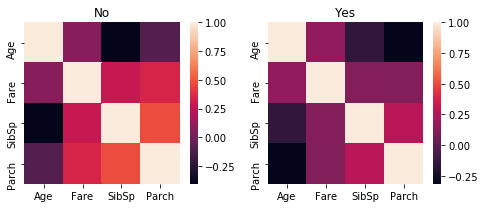

In [49]:
# correlacao por classe

plt.figure(figsize=(10, 3))
for c_i, c in enumerate(titanic_atributes.Survived.unique()):
    ax = plt.subplot(1, 3, c+1)
    plt.title(target_names[c_i])
    corr = titanic_atributes.loc[titanic_atributes.Survived == c, columns[:-1]].corr()
    sns.heatmap(corr)
    
plt.tight_layout()
plt.show()

#### Correlação e Covariância

O atributo mais informativo é a correlação, pois ele mostra a covariância normalizada, com isso, fica mais fácil deduzir se os dados tem relação ou não. A diferença entre elas é que a correlação é a covariância dividida pelo produto entre desvio padrão das duas variáveis. A covariância é recomendada quando você está analisando e comparando atributos de mesma magnitude, nos outros casos, a correlação é mais indicada. Dependendo das hipóteses formuladas, elas podem ajudar indicando se há ou não correlação linear entre os dois atributos.

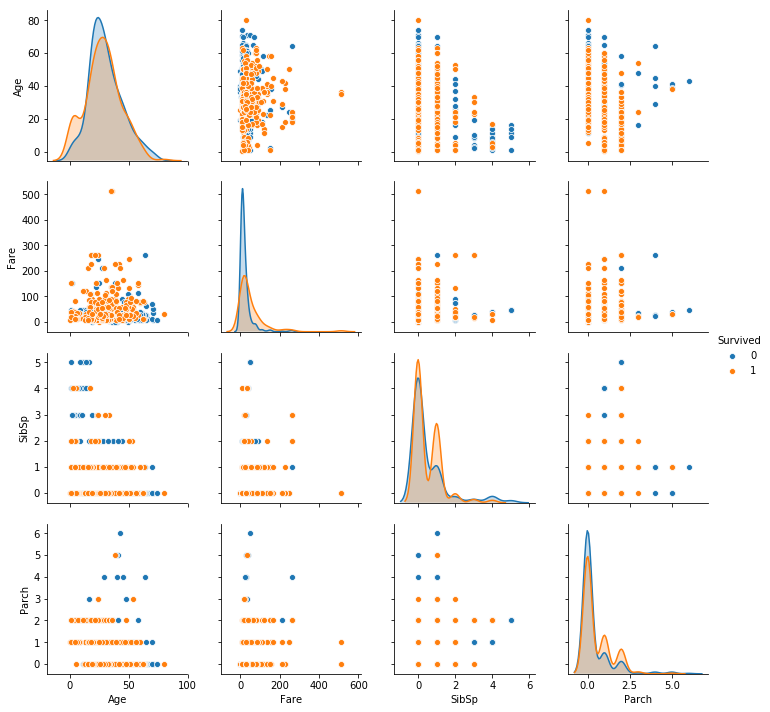

In [50]:
titanic_atributes = titanic_atributes.dropna(how='any')
sns.pairplot(data=titanic_atributes, vars=columns[1:-1], hue='Survived')
plt.show()

## Parte 2: Dataset IES

### 1) Hipóteses

1. O número de técnicos de ambos os gêneros é semelhante nos diferentes tipos de IES.

2. Qual a fonte de receita que mais financia a pesquisa?

3. Algum par de atributos consegue diferenciar os tipos de IES.

### 2) Atributos
A partir das hipóteses serão utilizados os seguintes atributos:

- DS_CATEGORIA_ADMINISTRATIVA
- VL_RECEITA_PROPRIA
- VL_TRANSFERENCIA
- VL_OUTRA_RECEITA
- QT_TEC_SUPERIOR_MASC
- QT_TEC_SUPERIOR_FEM
- VL_DES_PESQUISA

### 3) Análise Exploratória


In [56]:
IES = pd.read_csv('./datasets/DM_IES.CSV', sep='|', header=0, encoding='latin1')

columns = ['VL_DES_PESQUISA', 'VL_RECEITA_PROPRIA', 'VL_TRANSFERENCIA', 'VL_OUTRA_RECEITA',
        'QT_TEC_SUPERIOR_FEM', 'QT_TEC_SUPERIOR_MASC', 'DS_CATEGORIA_ADMINISTRATIVA']

IES = pd.DataFrame(data=np.c_[IES['VL_DES_PESQUISA'], IES['VL_RECEITA_PROPRIA'],
                              IES['VL_TRANSFERENCIA'], IES['VL_OUTRA_RECEITA'],
                              IES['QT_TEC_SUPERIOR_FEM'], IES['QT_TEC_SUPERIOR_MASC'],
                              IES['DS_CATEGORIA_ADMINISTRATIVA']],
                    columns=columns)
IES = IES.dropna(how='any')
tipos = IES.DS_CATEGORIA_ADMINISTRATIVA.unique()
IES

,VL_DES_PESQUISA,VL_RECEITA_PROPRIA,VL_TRANSFERENCIA,VL_OUTRA_RECEITA,QT_TEC_SUPERIOR_FEM,QT_TEC_SUPERIOR_MASC,DS_CATEGORIA_ADMINISTRATIVA
0,1.41491e+07,6.10798e+06,6.8833e+08,0,191,159,Pública Federal
1,5.16795e+07,3.7973e+08,1.82935e+09,1.25231e+07,417,383,Pública Federal
2,1.65966e+06,4.73483e+06,5.47728e+08,1.01951e+06,200,191,Pública Federal
3,0,1.58766e+07,5.14891e+07,6.39828e+08,215,191,Pública Federal
4,1.00325e+08,3.25701e+06,4.6831e+08,0,57,90,Pública Federal
5,1.02939e+07,5.43716e+08,0,3.88769e+06,220,97,Privada sem fins lucrativos
6,1.601e+06,1.02454e+08,0,2.741e+07,97,82,Privada sem fins lucrativos
7,1.27112e+07,2.98374e+08,0,3.18157e+07,240,74,Privada sem fins lucrativos
8,5.4049e+06,3.6444e+08,2.50489e+06,4.42751e+07,166,62,Privada sem fins lucrativos
9,34133.8,3.43847e+07,0,2.63056e+06,32,22,Privada sem fins lucrativos


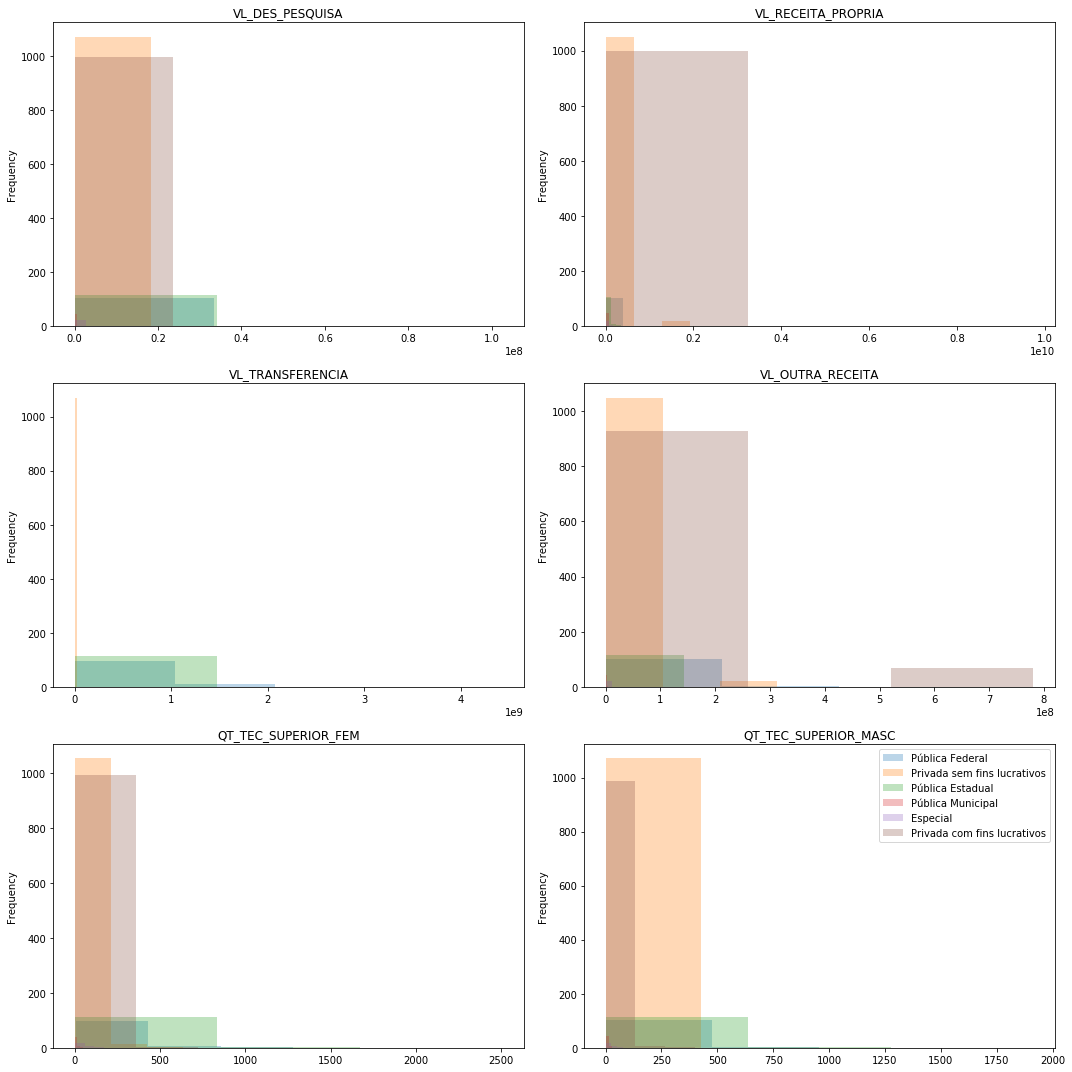

In [52]:
plt.figure(figsize=(15, 15))
for col in range(1,7):
    ax = plt.subplot(3, 2, col)
    ax.set_title(columns[col-1])
    for c in tipos:
        IES.loc[ IES.DS_CATEGORIA_ADMINISTRATIVA == c, columns[col-1]].plot.hist(alpha=0.3, bins=3)
plt.legend(tipos)
plt.tight_layout()
plt.show()

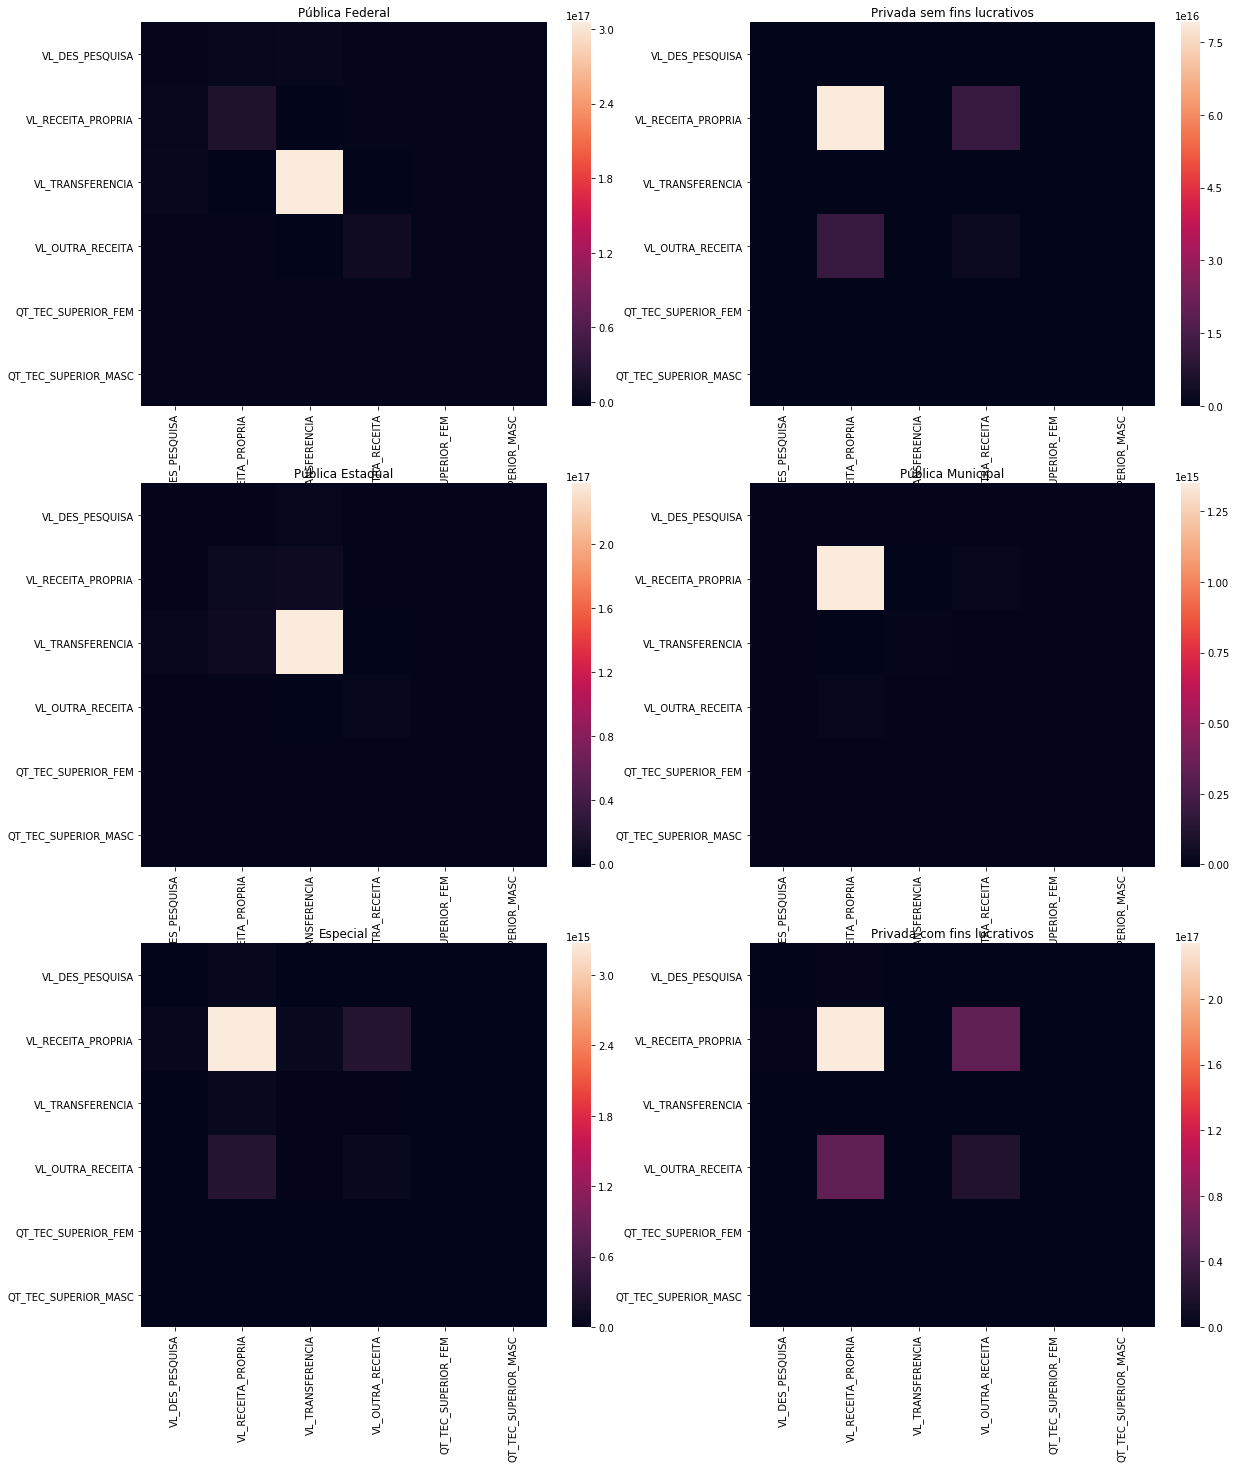

In [53]:
plt.figure(figsize=(20, 24))
IES
for c_i, c in enumerate(tipos):
    ax = plt.subplot(3, 2, c_i+1)
    plt.title(tipos[c_i])
    cov = IES.loc[ IES.DS_CATEGORIA_ADMINISTRATIVA == c, columns[:-1]].astype(float).cov()
    sns.heatmap(cov)
plt.show()

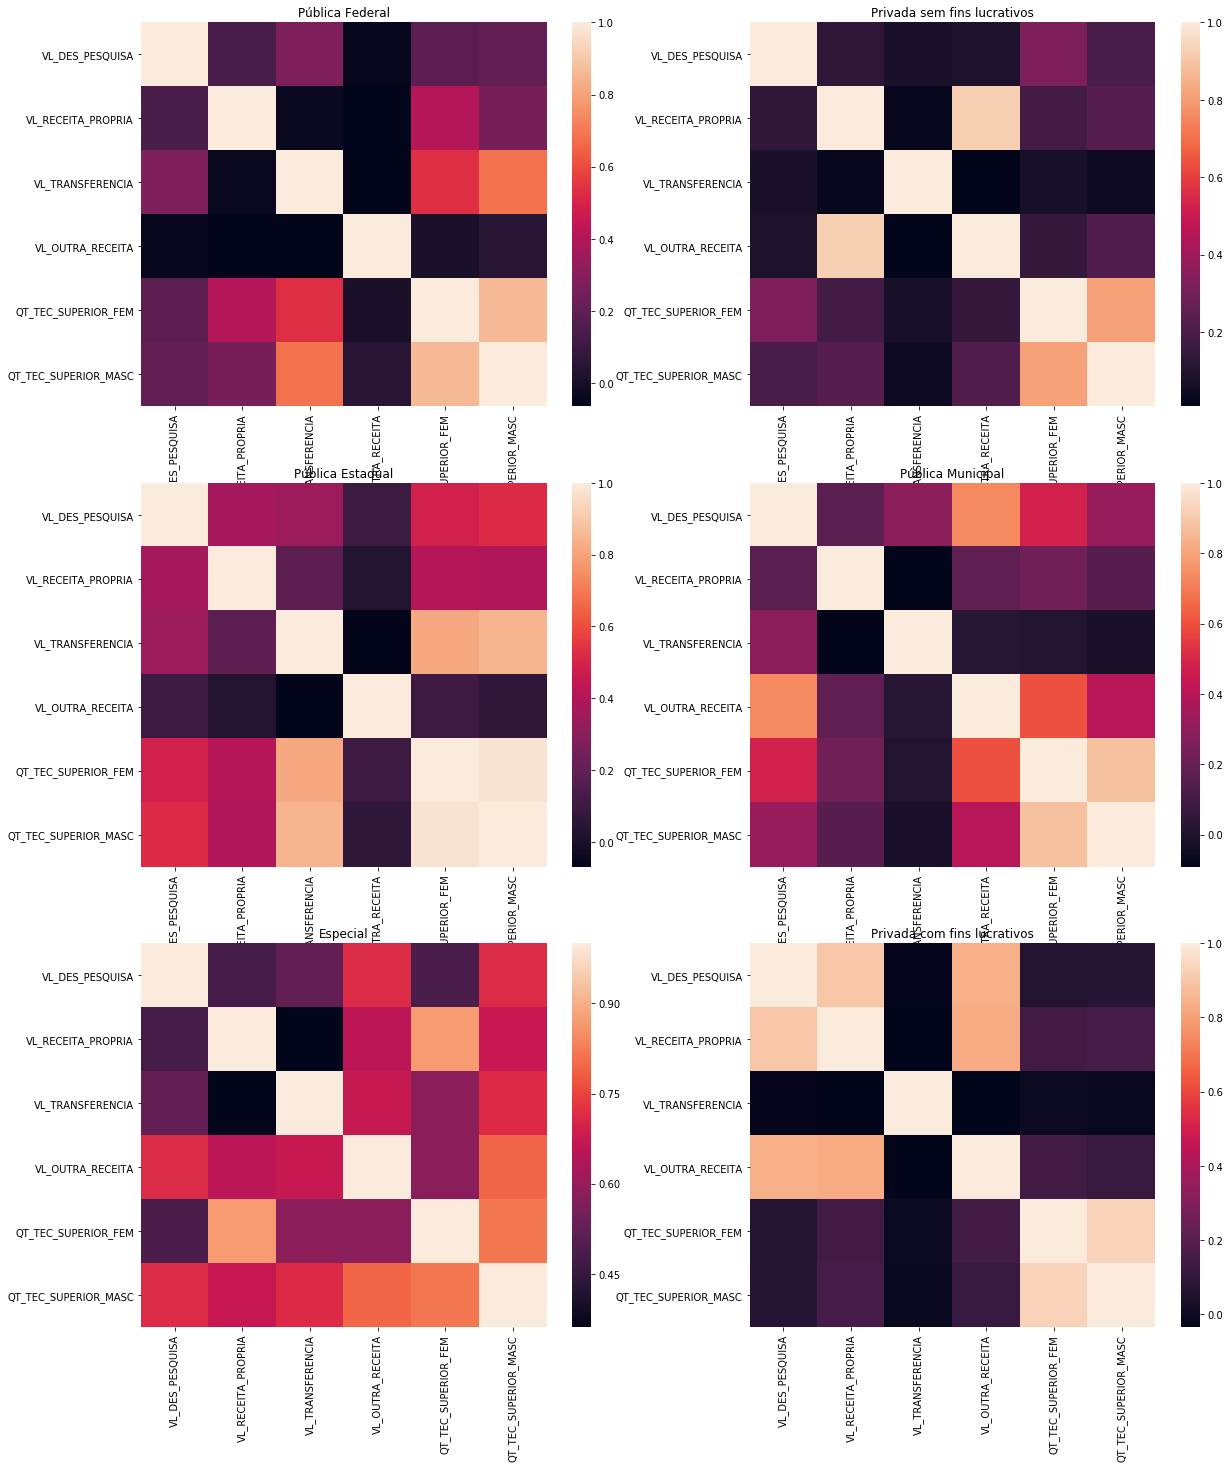

In [54]:
plt.figure(figsize=(20, 24))
IES
for c_i, c in enumerate(tipos):
    ax = plt.subplot(3, 2, c_i+1)
    plt.title(tipos[c_i])
    corr = IES.loc[ IES.DS_CATEGORIA_ADMINISTRATIVA == c, columns[:-1]].astype(float).corr()
    sns.heatmap(corr)
plt.show()

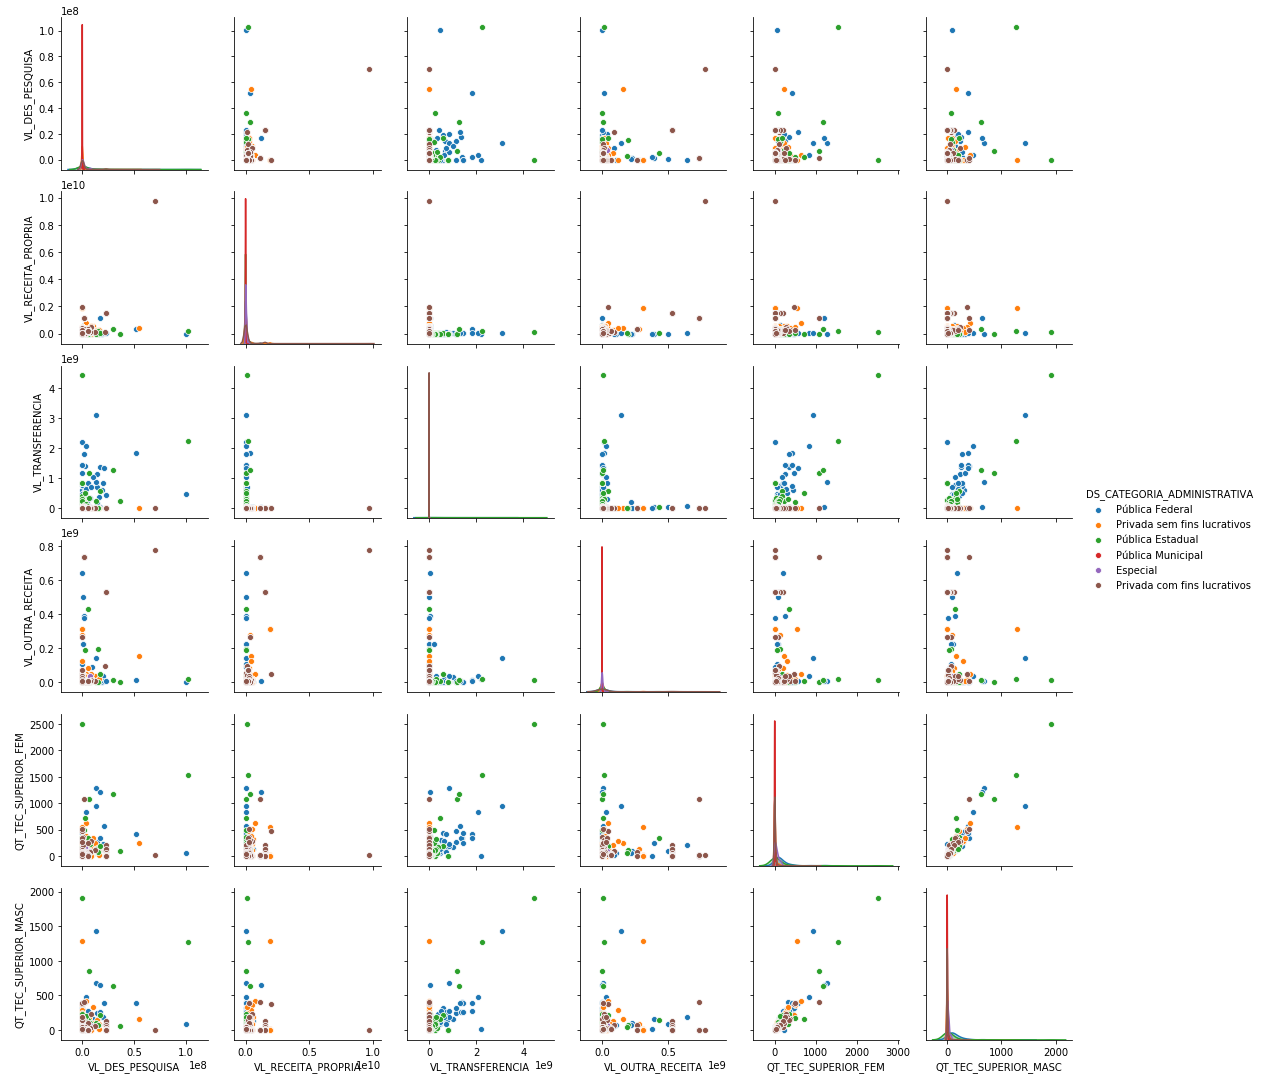

In [55]:
sns.pairplot(data=IES, vars=columns[:-1], hue='DS_CATEGORIA_ADMINISTRATIVA')
plt.show()

### 4) Respostas

1. O número de técnicos de ambos os gêneros é semelhante nos diferentes tipos de IES.
Usando os mapas de calor da correlação vemos que os atributos de número de técnicos do gênero masculino e feminino tem forte correlação, acima de 0,75, em todos os tipos de instituição. Destaque para as públicas estaduais e as privadas com fins lucrativos, onde os valores tem correlação muito próxima de 1.

2. Qual a fonte de receita que mais financia a pesquisa?
As receitas próprias são a que mais tem correlação com as despesas em pesquisa, em apenas um caso (Públicas Municipais) que outras receitas tem maior influência. Porém, as correlações são baixas na maioria dos casos, apenas em instituições privadas com fins lucrativos é que os valores são próximos de 1.

3. Algum par de atributos consegue diferenciar os tipos de IES.
Não, por causa da distribuição dos dados no scatter plot. Pelos gráficos de distribuição dos atributos vemos que os valores estão muito concentrados em uma mesma faixa do espaço bidimensional, o que dificulta a separação dos valores. Ao olhar os gráficos de pares de atributos, vemos muitas aglomerações com diferentes tipos de IES nesses aglomerados, impossibilitando uma classificação por apenas um par de atributos no espaço.